11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,074 (2.26 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.8696 - loss: 0.4772 - val_accuracy: 0.9788 - val_loss: 0.0677
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.9788 - loss: 0.0708 - val_accuracy: 0.9832 - val_loss: 0.0494
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.9875 - loss: 0.0436 - val_accuracy: 0.9860 - val_loss: 0.0449
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.9900 - loss: 0.0348 - val_accuracy: 0.9879 - val_loss: 0.0363
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9875 - val_loss: 0.0349
CNN Error: 1.25%
CNN Accuracy: 98.75%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


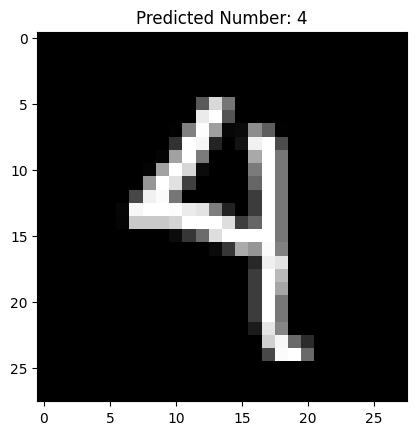

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)).astype('float32')
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)).astype('float32')

train_X = train_X / 255
test_X = test_X / 255

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
num_classes = test_y.shape[1]

model_cnn = Sequential()
model_cnn.add(Input(shape=(28, 28, 1)))
model_cnn.add(Conv2D(32, (5, 5), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()

history = model_cnn.fit(train_X, train_y, epochs=5, batch_size=200, validation_data=(test_X, test_y), verbose=1)

scores = model_cnn.evaluate(test_X, test_y, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

image_index = np.random.randint(0, len(test_X))
image = test_X[image_index]
image_for_prediction = np.expand_dims(image, axis=0)
prediction = model_cnn.predict(image_for_prediction)
predicted_class = np.argmax(prediction)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Number: {predicted_class}")
plt.show()

Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.8643 - loss: 0.4905 - val_accuracy: 0.9765 - val_loss: 0.0782
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 95ms/step - accuracy: 0.9786 - loss: 0.0718 - val_accuracy: 0.9819 - val_loss: 0.0543
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.9848 - val_loss: 0.0448
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accuracy: 0.9862 - val_loss: 0.0408
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.9925 - loss: 0.0261 - val_accuracy: 0.9879 - val_loss: 0.0337


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,776,224 (6.78 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,184,150 (4.52 MB)

Accuracy: 98.79%, Error: 1.21%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


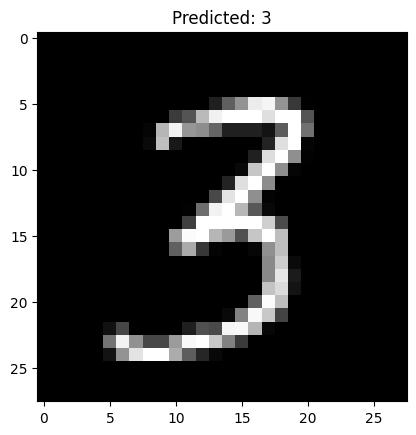

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np, matplotlib.pyplot as plt

# Load & preprocess
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1,28,28,1)/255.0, x_test.reshape(-1,28,28,1)/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Model
model = Sequential([
    Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,batch_size=200,validation_data=(x_test,y_test),verbose=1)

model.summary()

# Evaluate
loss,acc = model.evaluate(x_test,y_test,verbose=0)
print(f"Accuracy: {acc*100:.2f}%, Error: {(1-acc)*100:.2f}%")

# Predict random image
i = np.random.randint(len(x_test))
pred = np.argmax(model.predict(x_test[i][None,...]))
plt.imshow(x_test[i].reshape(28,28),cmap='gray'); plt.title(f"Predicted: {pred}"); plt.show()
